# Basic ML example.
From https://www.tensorflow.org/tutorials/keras/regression \
Basic regression example for prediction of fuel efficiency.\
It covers:
 - Data inspection and preprocessing
 - Normalization
 - Linear regression with one variable
 - Linear refresion with multiple variables
 - DNN with one variable
 - DNN with miltiple variables

In [205]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [206]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [207]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [208]:
dataset.shape

(398, 8)

In [209]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [210]:
# Clean unkown values
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [211]:
dataset.shape

(392, 8)

In [212]:
# From categorical to indicator variables
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 27.6+ KB


In [213]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [214]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [215]:
# Split into training and test datasets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 146 to 182
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           314 non-null    float64
 1   Cylinders     314 non-null    int64  
 2   Displacement  314 non-null    float64
 3   Horsepower    314 non-null    float64
 4   Weight        314 non-null    float64
 5   Acceleration  314 non-null    float64
 6   Model Year    314 non-null    int64  
 7   Europe        314 non-null    uint8  
 8   Japan         314 non-null    uint8  
 9   USA           314 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 20.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 9 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           78 non-null     float64
 1   Cylinders     78 non-null     int64  
 2   Displacement  78 non-null     float

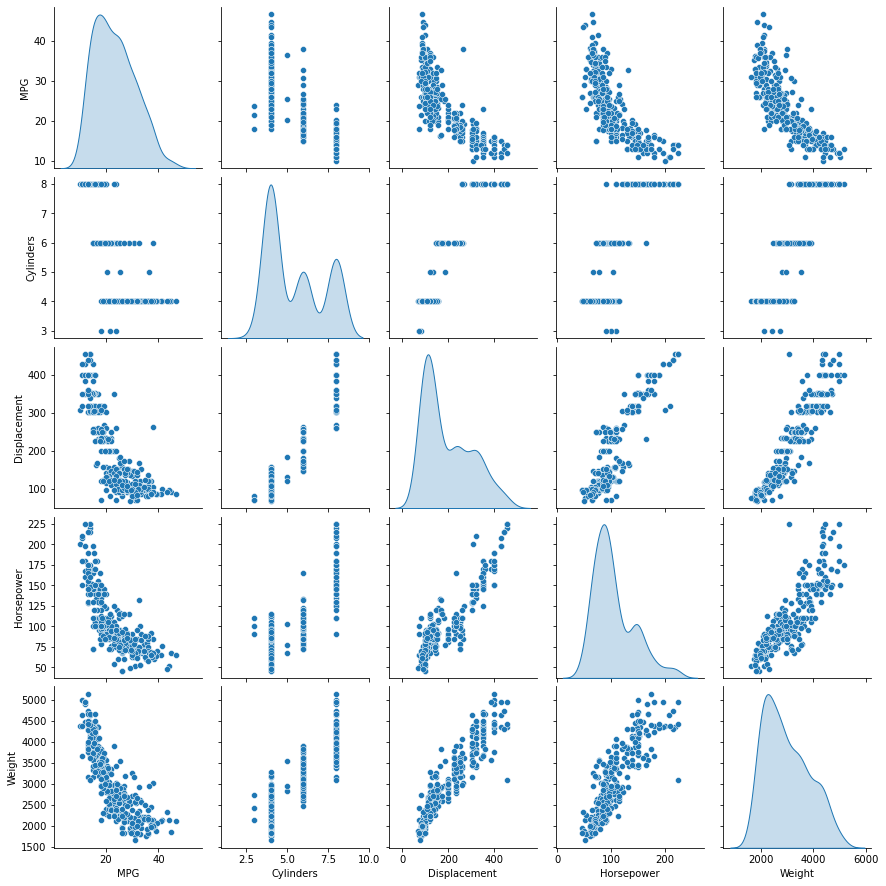

In [216]:
# Inspect the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']], diag_kind='kde')

In [217]:
# Get some statistics
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [218]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_features

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,16.0,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,26.0,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [219]:
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [220]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]
First example: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


array([[<AxesSubplot:title={'center':'Horsepower'}>]], dtype=object)

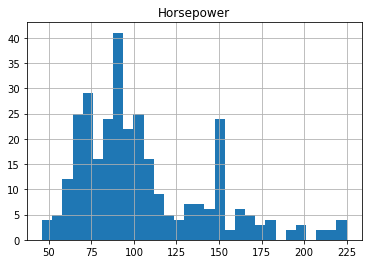

In [221]:
# The Normalization Layer - Example
# This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

train_features.hist('Horsepower', bins=30)

(array([ 4.,  5., 12., 25., 29., 16., 24., 41., 22., 25., 16.,  9.,  5.,
         4.,  7.,  7.,  6., 24.,  2.,  6.,  5.,  3.,  4.,  0.,  2.,  3.,
         0.,  2.,  2.,  4.]),
 array([-1.5477499 , -1.3908789 , -1.234008  , -1.077137  , -0.920266  ,
        -0.76339495, -0.606524  , -0.449653  , -0.29278204, -0.13591105,
         0.02095993,  0.17783092,  0.3347019 ,  0.4915729 ,  0.6484439 ,
         0.80531484,  0.9621858 ,  1.1190568 ,  1.2759278 ,  1.4327987 ,
         1.5896697 ,  1.7465408 ,  1.9034117 ,  2.0602827 ,  2.2171535 ,
         2.3740246 ,  2.5308957 ,  2.6877666 ,  2.8446376 ,  3.0015085 ,
         3.1583796 ], dtype=float32),
 <BarContainer object of 30 artists>)

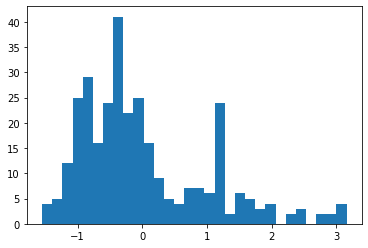

In [222]:
train_features_norm = normalizer(train_features)
tf_norm = train_features_norm.numpy()
plt.hist(tf_norm[:,2], bins=30)

In [223]:
## Linear regression with one variable
## Predict MPG form horsepower
# Normalization layer
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
print(horsepower_normalizer.mean.numpy())
print(horsepower_normalizer.variance.numpy())

first = np.array(horsepower[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', horsepower_normalizer(first).numpy())

[104.869446]
[1446.6993]
First example: [75.]

Normalized: [-0.79]


In [224]:
# Build keras sequential model
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [225]:
# Run the untrained model on the first 10 samples 
# just to check the output shape
horsepower_model.predict(horsepower[:10])

array([[ 0.8691034 ],
       [ 0.49084583],
       [-1.6041192 ],
       [ 1.2182642 ],
       [ 1.1018773 ],
       [ 0.43265232],
       [ 1.3055544 ],
       [ 1.1018773 ],
       [ 0.28716865],
       [ 0.49084583]], dtype=float32)

In [226]:
# Configure the training of the model
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [227]:
%%time 
# Execute the training
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4 s, sys: 672 ms, total: 4.67 s
Wall time: 3.34 s


In [228]:
# Get the training process numbers
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804731,4.190461,95
96,3.803357,4.165848,96
97,3.803890,4.179460,97
98,3.818617,4.212931,98
99,3.802952,4.186524,99


In [229]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

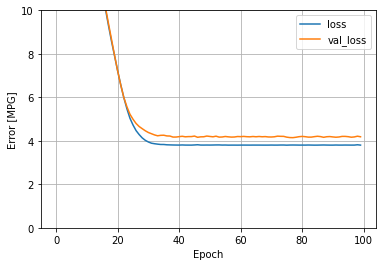

In [230]:
plot_loss(history)

In [231]:
# Get the weights
# Not exaclty b and m for an y=mx+b 
# since we have a normalization layer
w = horsepower_model.get_weights()
mean, var, n, m, b = w
print(w)

[104.869446, 1446.6993, 314, array([[-6.3310866]], dtype=float32), array([22.550905], dtype=float32)]


In [232]:
# Evaluate using the test dataset
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [233]:
test_results['horsepower_model']

3.656334400177002

In [234]:
# make predictions using the trained model
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [235]:
# function to compare predictions vs data
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

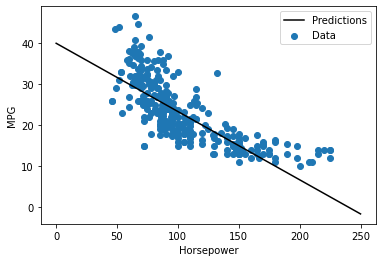

In [236]:
plot_horsepower(x,y)

In [237]:
## Linear Regression with multiple inputs
# Build keras sequential model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [238]:
# Configure the training of the model
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [239]:
%%time
# Execute the training
history = linear_model.fit(
    train_features.values, train_labels.values, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 4.03 s, sys: 661 ms, total: 4.69 s
Wall time: 3.43 s


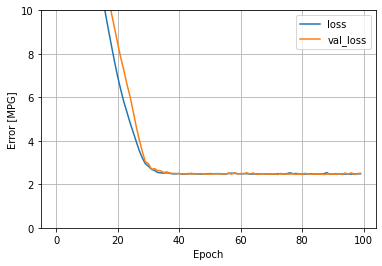

In [240]:
plot_loss(history)

In [241]:
# Evaluate using the test dataset
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [242]:
test_results

{'horsepower_model': 3.656334400177002, 'linear_model': 2.4985055923461914}

In [243]:
# Regression with a deep neural network (DNN)
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [244]:
# Regression using a DNN and a single input
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [245]:
dnn_horsepower_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [246]:
%%time
# Execute the training
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 4.17 s, sys: 671 ms, total: 4.84 s
Wall time: 3.63 s


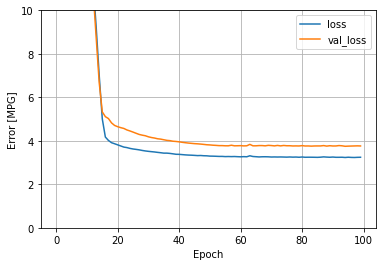

In [247]:
plot_loss(history)

In [248]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

In [249]:
test_results

{'horsepower_model': 3.656334400177002,
 'linear_model': 2.4985055923461914,
 'dnn_horsepower_model': 2.882105588912964}

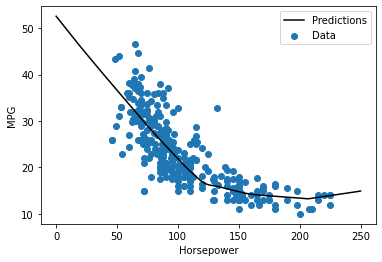

In [250]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)
plot_horsepower(x, y)

In [251]:
# Regression using a DNN and multiple inputs
dnn_model = build_and_compile_model(normalizer)
dnn_model

In [252]:
dnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_9 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_21 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [253]:
%%time
history = dnn_model.fit(
    train_features.values, train_labels.values,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 3.93 s, sys: 647 ms, total: 4.58 s
Wall time: 3.45 s


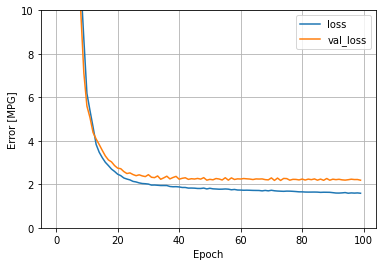

In [254]:
plot_loss(history)

In [255]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results

{'horsepower_model': 3.656334400177002,
 'linear_model': 2.4985055923461914,
 'dnn_horsepower_model': 2.882105588912964,
 'dnn_model': 1.7530966997146606}

In [256]:
# Let's compare the test results of the models
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.656334
linear_model,2.498506
dnn_horsepower_model,2.882106
dnn_model,1.753097


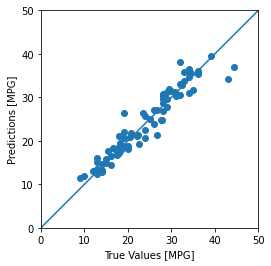

In [257]:
# Make predictions using the DNN model with multiple inputs
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

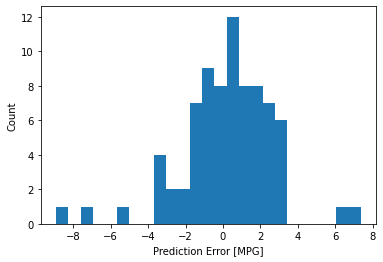

In [258]:
# Histogram of the prediction errors
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [259]:
# Save the model
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [260]:
# Reload model and get identical results
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [261]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.656334
linear_model,2.498506
dnn_horsepower_model,2.882106
dnn_model,1.753097
reloaded,1.753097


In [262]:
# DONE!